In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [95]:
bezirke = [
    'charlottenburg-wilmersdorf',
    'friedrichshain-kreuzberg',
    'lichtenberg',
    'marzahn-hellersdorf',
    'mitte',
    'neukoelln',
    'pankow',
    'reinickendorf',
    'spandau',
    'steglitz-zehlendorf',
    'tempelhof-schoeneberg',
    'treptow-koepenick'
]
years = [2013, 2014, 2015, 2016]
data_path = '../data/raw/'

dfs = []
for year in years:
    for bezirk in bezirke:
        df = pd.read_csv( data_path + str(year) +'-'+ bezirk + '.csv', sep=';')
        df = df.dropna()
        df = df.assign(Bezirk=bezirk, Year=year)
        total_number_names = df['anzahl'].sum()
        df = df.assign(frequency = lambda df: df['anzahl']/total_number_names )
        #df_m = df[df['geschlecht']=='m']
        #print(df_m[ df_m['frequency'] == df_m['frequency'].max() ]['vorname'])
        dfs.append(df)
        
df = pd.concat(dfs)
#df = df.sort_values('anzahl', ascending=False )

In [96]:
df.head()

,Bezirk,Year,anzahl,frequency,geschlecht,vorname
0,charlottenburg-wilmersdorf,2013,121,0.013668,w,Marie
1,charlottenburg-wilmersdorf,2013,96,0.010844,w,Sophie
2,charlottenburg-wilmersdorf,2013,77,0.008698,w,Charlotte
3,charlottenburg-wilmersdorf,2013,66,0.007455,w,Emilia
4,charlottenburg-wilmersdorf,2013,64,0.007229,m,Paul


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109988 entries, 0 to 1127
Data columns (total 6 columns):
Bezirk        109988 non-null object
Year          109988 non-null int64
anzahl        109988 non-null int64
frequency     109988 non-null float64
geschlecht    109988 non-null object
vorname       109988 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 5.9+ MB


Most common names:  [('Marie', 'w'), ('Sophie', 'w'), ('Charlotte', 'w'), ('Alexander', 'm'), ('Maria', 'w'), ('Paul', 'm'), ('Maximilian', 'm'), ('Emilia', 'w'), ('Elias', 'm'), ('Anna', 'w')]


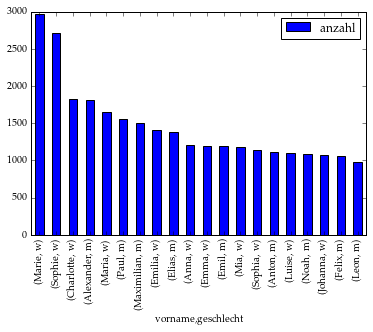

In [98]:
# Group names, calculate most common nampes
dfgroup = df[['Year','vorname','anzahl','geschlecht']].groupby(by=['vorname', 'geschlecht']).sum()
dfgroup = dfgroup.sort_values('anzahl', ascending=False)
#dfgroup.assign(name = dfgroup.index)
#plt.bar(dfgroup[0:10].index, dfgroup['anzahl'][0:10])
dfgroup[0:20].plot.bar(y='anzahl')
most_common_names = list(dfgroup[0:200].index)
print('Most common names: ', most_common_names[0:10])
#dfgroup.index
#for vorname in dfgroup['vorname'].unique():
#    nameseries = dfgroup[dfgroup['vorname'] == vorname]
#    plt.plot(nameseries['Year'], nameseries['anzahl'], label=vorname )

In [99]:
# Calculate the mean frequency of the most common names per year
mean_freqs = pd.DataFrame(columns=['vorname', 'year', 'mean_freq', 'geschlecht'])
for name, geschlecht in most_common_names: #df['vorname'].unique():
    for year in df['Year'].unique():
        mean_freq = df[ (df['vorname'] == name) & (df['Year']==year) & (df['geschlecht']==geschlecht)]['frequency'].mean()
#        mean_freqs.append(pd.DataFrame([name, year, mean_freq]))
        mean_freqs.loc[mean_freqs.shape[0]] = [name, year, mean_freq, geschlecht]

mean_freqs['id'] = mean_freqs['vorname'] + mean_freqs['geschlecht'] + mean_freqs['year'].map(int).map(str)
#mean_freqs['id'].apply(lambda x: str(x['vorname']) + str(x['year']))
mean_freqs.head(10)

,vorname,year,mean_freq,geschlecht,id
0,Marie,2013.0,0.011896,w,Mariew2013
1,Marie,2014.0,0.011554,w,Mariew2014
2,Marie,2015.0,0.012445,w,Mariew2015
3,Marie,2016.0,0.010603,w,Mariew2016
4,Sophie,2013.0,0.011471,w,Sophiew2013
5,Sophie,2014.0,0.011502,w,Sophiew2014
6,Sophie,2015.0,0.010157,w,Sophiew2015
7,Sophie,2016.0,0.009063,w,Sophiew2016
8,Charlotte,2013.0,0.006970,w,Charlottew2013
9,Charlotte,2014.0,0.006459,w,Charlottew2014


In [100]:
# Add mean_freq to df (RUN ONLY ONCE)
df['id'] = df['vorname'] + df['geschlecht'] + df['Year'].map(str)
df = pd.merge(df, mean_freqs[['mean_freq','id']], on='id', how='outer')
df.head()

,Bezirk,Year,anzahl,frequency,geschlecht,vorname,id,mean_freq
0,charlottenburg-wilmersdorf,2013,121,0.013668,w,Marie,Mariew2013,0.011896
1,friedrichshain-kreuzberg,2013,71,0.010746,w,Marie,Mariew2013,0.011896
2,lichtenberg,2013,66,0.013401,w,Marie,Mariew2013,0.011896
3,marzahn-hellersdorf,2013,16,0.009715,w,Marie,Mariew2013,0.011896
4,mitte,2013,64,0.008652,w,Marie,Mariew2013,0.011896


In [103]:
df['freq_dev'] = (df['frequency'] - df['mean_freq']) / df['mean_freq']
df_freq = df.sort_values('freq_dev', ascending=False)
df_freq[(df_freq['Bezirk']=='neukoelln') & (df_freq['Year']==2016)].dropna()

,Bezirk,Year,anzahl,frequency,geschlecht,vorname,id,mean_freq,freq_dev
84384,neukoelln,2016,25,0.004320,m,Yusuf,Yusufm2016,0.001504,1.872072
86383,neukoelln,2016,13,0.002246,m,Emir,Emirm2016,0.000929,1.418307
82616,neukoelln,2016,16,0.002765,m,Amir,Amirm2016,0.001170,1.362543
82719,neukoelln,2016,12,0.002074,m,Malik,Malikm2016,0.000911,1.277338
83507,neukoelln,2016,16,0.002765,m,Muhammed,Muhammedm2016,0.001414,0.954888
81095,neukoelln,2016,28,0.004838,m,Ali,Alim2016,0.002500,0.935054
83366,neukoelln,2016,12,0.002074,m,Can,Canm2016,0.001147,0.808410
82823,neukoelln,2016,11,0.001901,w,Valentina,Valentinaw2016,0.001102,0.724418
82911,neukoelln,2016,17,0.002938,w,Lilly,Lillyw2016,0.001715,0.713238
82307,neukoelln,2016,19,0.003283,w,Elif,Elifw2016,0.002040,0.609585


In [ ]:
plt.step(x=range(len(dfgroup)),y=dfgroup[ dfgroup['anzahl']>0]['anzahl'])
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
dfgroup2 = df[['Year', 'vorname', 'anzahl']].groupby(by=['vorname', 'Year']).sum()
#dfgroup2 = df[['Year', 'vorname', 'anzahl']].groupby(['vorname', 'Year']).sum().groupby('Year')

#dfgroup2.reset_index()
dfgroup2 = dfgroup2.sort_values('anzahl', ascending=False)
best_names = dfgroup2.index.get_level_values('vorname').unique()[0:10]
#years = dfgroup2.index.get_level_values('Year').unique()
#dfgroup2.iloc[ dfgroup2.index['Year']==2015 ]

#dfgroup2.loc['Marie'].sort_index()
for name in best_names:
    #dfgroup2.loc[name].sort_index().plot.line() 
    plt.plot(dfgroup2.loc[name].sort_index(), label=name)
plt.legend(loc='right')
#dfgroup2.iloc[dfgroup2.index.get_level_values('Year') == 2015]

In [ ]:
dfgroup.head()

In [ ]:
dfgroup = df.groupby(by=['Year', 'Bezirk', 'vorname']).sum()
dfgroup.head(10)